In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from transduction import (
    FST, EPSILON, PrecoverDecomp, examples, Precover, AbstractAlgorithm,
    LazyRecursive, BuggyLazyRecursive, EagerNonrecursive, LazyPrecoverNFA, LazyNonrecursive,    
)
from transduction.fsa import FSA
from transduction.peekaboo import Peekaboo, PeekabooPrecover, recursive_testing
from transduction.util import display_table

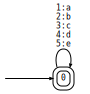

In [5]:
fst = examples.replace([('1', 'a'), ('2', 'b'), ('3', 'c'), ('4', 'd'), ('5', 'e')])
fst

In [7]:
p = Peekaboo(fst)
target = ''
have = p(target)
tmp = EagerNonrecursive(fst)
want = {y: tmp(target + y) for y in tmp.target_alphabet}
assert have == want

target = 'abc'
have = p(target)
tmp = EagerNonrecursive(fst)
want = {y: tmp(target + y) for y in tmp.target_alphabet}
assert have == want

In [8]:
#p.nfa

In [9]:
#p.dfa

In [10]:
#assert np.sum([Precover(fst, target + y).fsa for y in fst.B - {EPSILON}]).equal(p.nfa)

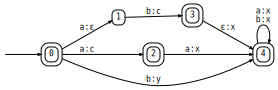

In [11]:
fst = examples.samuel_example()
fst

In [12]:
p = Peekaboo(fst)
target = 'y'
have = p(target)
tmp = EagerNonrecursive(fst)
want = {y: tmp(target + y) for y in tmp.target_alphabet}

print(have)
print(want)

assert have == want

{'c': (set(), set()), 'y': (set(), set()), 'x': ({'ba', 'bb'}, set())}
{'c': (set(), set()), 'y': (set(), set()), 'x': ({'ba', 'bb'}, set())}


In [13]:
display(p.nfa)
display(p.dfa)


In [14]:
p = Peekaboo(fst)
target = ''
have = p(target)
tmp = EagerNonrecursive(fst)

want = {y: tmp(target + y) for y in tmp.target_alphabet}

print('have=', have)
print('want=', want)

assert have == want

have= {'c': ({'a'}, set()), 'y': ({'b'}, set()), 'x': (set(), set())}
want= {'c': ({'a'}, set()), 'y': ({'b'}, set()), 'x': (set(), set())}


In [15]:
recursive_testing(fst, '', 4)

In [16]:
#union = FSA.zero
#for y in sam.B - {EPSILON}:
#    union |= Precover(sam, y).fsa
#union.min()

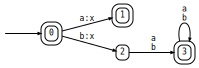

In [17]:
f = FST()
f.add_I(0)
f.add_F(0)

f.add_arc(0, 'a', 'x', 1)
f.add_arc(0, 'b', 'x', 2)

f.add_arc(2, 'a', 'a', 3)
f.add_arc(2, 'b', 'b', 3)

f.add_arc(3, 'a', 'a', 3)
f.add_arc(3, 'b', 'b', 3)

f.add_F(1)
f.add_F(3)

f

In [18]:
p = Peekaboo(f)
target = ''
have = p(target)
tmp = EagerNonrecursive(f)

want = {y: tmp(target + y) for y in tmp.target_alphabet}

print('have=', have)
print('want=', want)

assert have == want

have= {'a': (set(), set()), 'b': (set(), set()), 'x': ({'ba', 'bb'}, {'a'})}
want= {'a': (set(), set()), 'b': (set(), set()), 'x': ({'ba', 'bb'}, {'a'})}


In [19]:
recursive_testing(f, '', 5)

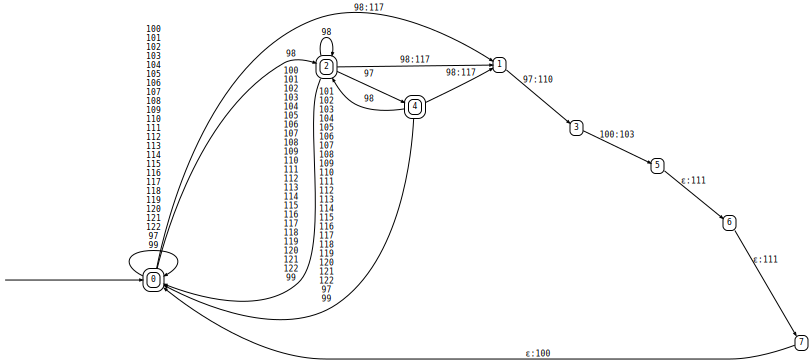

In [20]:
self = examples.newspeak()
self

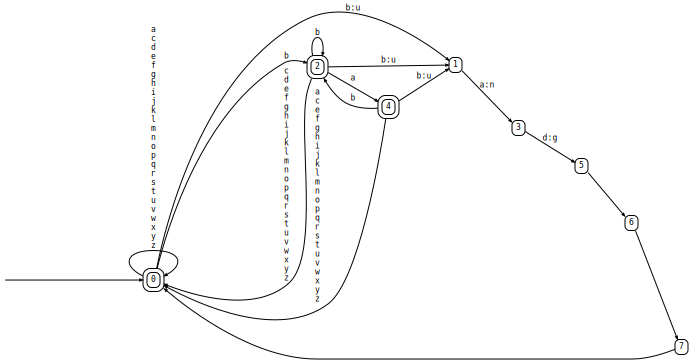

In [37]:
m = FST()
for i in self.I:
    m.add_I(i)
for i in self.states:
    for a, b, j in self.arcs(i):
        m.add_arc(i, bytes([a]).decode() if a != EPSILON else EPSILON, bytes([b]).decode() if a != EPSILON else EPSILON, j)
for i in self.F:
    m.add_F(i)
m

In [36]:
p = Peekaboo(m, max_steps=50)
target = ''
have = p(target)
tmp = EagerNonrecursive(m)

want = {y: tmp(target + y) for y in tmp.target_alphabet}

print('have=', have)
print('want=', want)

for y in have | want:
    if have.get(y) == want.get(y):
        print(colors.mark(True), repr(y))
    else:
        print(colors.mark(False), repr(y))
        print('    have=', have.get(y))
        print('    want=', want.get(y))
        #Precover(m, target + y).check_decomposition(*want[y], throw=True)
        Precover(m, target + y).check_decomposition(*have[y], throw=False)
assert have == want

NOTE 
count = {'u', 'b'}
xs = 'b'
target = ''
state = {(1, 'u'),(2, 'b')}

NOTE 
count = {'u', 'b'}
xs = 'ba'
target = ''
state = {(4, 'b'),(3, 'u')}

stopped early
have= {'a': ({'a'}, set()), 't': ({'t'}, set()), 'e': ({'e'}, set()), 'd': ({'d'}, set()), 'b': ({'bv', 'bb', 'b', 'bq', 'bo', 'bp', 'bn', 'bf', 'bj', 'bi', 'bc', 'bt', 'bk', 'bg', 'bl', 'br', 'ba', 'bm', 'bu', 'bh', 'be', 'bd', 'bw', 'bs'}, {'ba', 'b'}), 'l': ({'l'}, set()), 'c': ({'c'}, set()), 'i': ({'i'}, set()), 'p': ({'p'}, set()), 'j': ({'j'}, set()), 'n': ({'n'}, set()), 'm': ({'m'}, set()), 'x': ({'x'}, set()), 'q': ({'q'}, set()), 'f': ({'f'}, set()), 'w': ({'w'}, set()), 'y': ({'y'}, set()), 'g': ({'g'}, set()), 'u': ({'u', 'b', 'ba'}, {'ba', 'b'}), 'r': ({'r'}, set()), 's': ({'s'}, set()), 'k': ({'k'}, set()), 'o': ({'o'}, set()), 'v': ({'v'}, set()), 'z': ({'z'}, set()), 'h': ({'h'}, set())}
want= {'a': ({'a'}, set()), 't': ({'t'}, set()), 'e': ({'e'}, set()), 'd': ({'d'}, set()), 'b': ({'bay', 'bv', 'ban', 'bb

AssertionError: 

In [24]:
from transduction.vibes import visualize_automaton

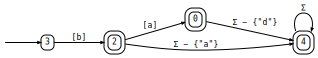

In [28]:
visualize_automaton(Precover(m, 'b').fsa.det().trim().min())

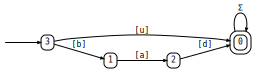

In [27]:
visualize_automaton(Precover(m, 'u').fsa.det().trim().min())